In [47]:
import torch
import torchvision
from torchvision import datasets

In [48]:
effnet_weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT
transforms_food101=effnet_weights.transforms()
effnet_food101=torchvision.models.efficientnet_b2(weights=effnet_weights)

In [49]:

from torchinfo import summary
summary(effnet_food101)

Layer (type:depth-idx)                                  Param #
EfficientNet                                            --
├─Sequential: 1-1                                       --
│    └─Conv2dNormActivation: 2-1                        --
│    │    └─Conv2d: 3-1                                 864
│    │    └─BatchNorm2d: 3-2                            64
│    │    └─SiLU: 3-3                                   --
│    └─Sequential: 2-2                                  --
│    │    └─MBConv: 3-4                                 1,448
│    │    └─MBConv: 3-5                                 612
│    └─Sequential: 2-3                                  --
│    │    └─MBConv: 3-6                                 6,004
│    │    └─MBConv: 3-7                                 10,710
│    │    └─MBConv: 3-8                                 10,710
│    └─Sequential: 2-4                                  --
│    │    └─MBConv: 3-9                                 16,518
│    │    └─MBConv: 3-10       

In [50]:
num_classes=3
for param in effnet_food101.parameters():
    param.requires_grad=False
effnet_food101.classifier=torch.nn.Linear(in_features=1408,out_features=num_classes)

In [51]:
from going_modular import data_setup
from torchvision import transforms

train_dataloader,test_data_loader,class_names=data_setup.create_dataloaders(train_dir='data/pizza_steak_sushi/train',
                              test_dir='data/pizza_steak_sushi/test',
                              batch_size=32,
                              transform=transforms_food101)

In [52]:
from going_modular import engine

results=engine.train(model=effnet_food101,train_dataloader=train_dataloader,test_dataloader=test_data_loader,
                     optimizer=torch.optim.Adam(params=effnet_food101.parameters(),lr=0.001),
                     loss_fn=torch.nn.CrossEntropyLoss(),
                     epochs=10)

 10%|█         | 1/10 [01:01<09:09, 61.02s/it]

Epoch: 0 | Train loss: 1.0937 | Train acc: 0.3945 | Test loss: 0.9523 | Test acc: 0.5294


 10%|█         | 1/10 [01:51<16:39, 111.10s/it]


KeyboardInterrupt: 

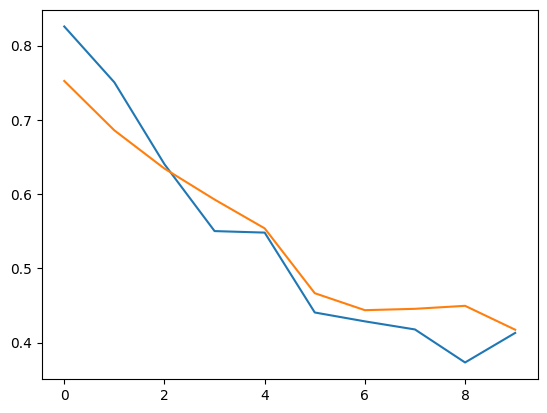

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results["train_loss"],label="train_loss")
plt.plot(results["test_loss"],label="test_loss")

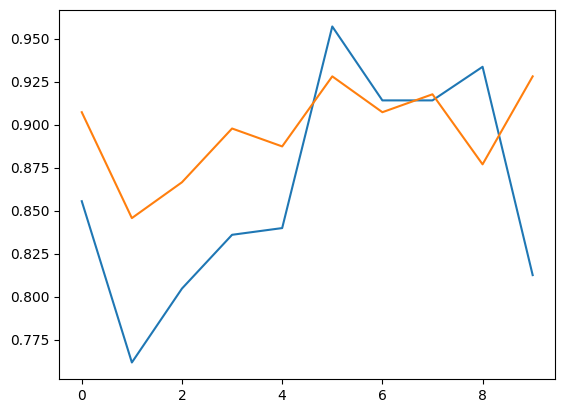

In [ ]:
plt.plot(results["train_acc"],label="train_loss")
plt.plot(results["test_acc"],label="test_loss")

In [ ]:
from pathlib import Path

test_folder = Path("data/pizza_steak_sushi/test")

image_paths = list(test_folder.rglob("*.[jp][pn]g")) 


print(f"Total images found: {len(image_paths)}")
print(image_paths[:60])

Total images found: 75
[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'), PosixPath('data/pizza_stea

In [ ]:
from PIL import Image

for i in range(60):
    img = Image.open(image_paths[i])
    effnet_food101.eval()
    with torch.inference_mode():
        img_tensor=Image.open(image_paths[i]).convert("RGB")
        img_tensor=transforms_food101(img_tensor)
        model_logits=effnet_food101(img_tensor.unsqueeze(0))
        probs=torch.softmax(model_logits,dim=1)
        pred=torch.argmax(probs,dim=1)
        pred_class=class_names[pred.item()]
        actual_class=image_paths[i].parent.stem
        print(f"Pred: {pred_class} | Actual: {actual_class}")

Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: pizza | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: steak | Actual: steak
Pred: sushi | Actual: steak
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: pizza | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual: sushi
Pred: sushi | Actual

In [ ]:
import torchvision
import torch
vit_food101_weights=torchvision.models.ViT_B_16_Weights.DEFAULT
vit_food101=vit_food101_weights.transforms()
vit_food101_model=torchvision.models.vit_b_16(weights=vit_food101_weights)
vit_food101_model.heads= torch.nn.Linear(in_features=768,out_features=3)

In [ ]:
from going_modular import data_setup
train_dataloader,test_data_loader,class_names=data_setup.create_dataloaders(train_dir='data/pizza_steak_sushi/train',
                              test_dir='data/pizza_steak_sushi/test',
                              batch_size=32,
                              transform=vit_food101)


In [ ]:
from going_modular import engine
results=engine.train(model=vit_food101_model,train_dataloader=train_dataloader,test_dataloader=test_data_loader,
                     optimizer=torch.optim.Adam(params=vit_food101_model.parameters(),lr=0.001),
                     loss_fn=torch.nn.CrossEntropyLoss(),
                     epochs=10)


/Users/jaswanthb/.local/share/virtualenvs/jaswanthb-71VjwBC8/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 10%|█         | 1/10 [01:33<14:00, 93.42s/it]

Epoch: 0 | Train loss: 2.2207 | Train acc: 0.2969 | Test loss: 1.0663 | Test acc: 0.5322


 20%|██        | 2/10 [03:07<12:30, 93.81s/it]

Epoch: 1 | Train loss: 1.0686 | Train acc: 0.4688 | Test loss: 1.4207 | Test acc: 0.2604


 30%|███       | 3/10 [04:37<10:44, 92.03s/it]

Epoch: 2 | Train loss: 1.2217 | Train acc: 0.3242 | Test loss: 1.0545 | Test acc: 0.5625


 40%|████      | 4/10 [06:05<09:03, 90.62s/it]

Epoch: 3 | Train loss: 1.1922 | Train acc: 0.4180 | Test loss: 1.3006 | Test acc: 0.1979


 50%|█████     | 5/10 [08:54<09:54, 118.84s/it]

Epoch: 4 | Train loss: 1.1079 | Train acc: 0.3984 | Test loss: 1.1655 | Test acc: 0.3021


 60%|██████    | 6/10 [10:26<07:18, 109.57s/it]

Epoch: 5 | Train loss: 1.0329 | Train acc: 0.4141 | Test loss: 1.0528 | Test acc: 0.5246


 70%|███████   | 7/10 [12:00<05:13, 104.53s/it]

Epoch: 6 | Train loss: 0.9716 | Train acc: 0.5430 | Test loss: 1.3351 | Test acc: 0.3021


 80%|████████  | 8/10 [13:28<03:18, 99.25s/it] 

Epoch: 7 | Train loss: 1.1132 | Train acc: 0.5078 | Test loss: 1.1438 | Test acc: 0.4110


 90%|█████████ | 9/10 [14:56<01:35, 95.90s/it]

Epoch: 8 | Train loss: 1.0248 | Train acc: 0.5078 | Test loss: 1.0612 | Test acc: 0.4413


100%|██████████| 10/10 [16:28<00:00, 98.81s/it]

Epoch: 9 | Train loss: 0.9859 | Train acc: 0.4375 | Test loss: 1.4024 | Test acc: 0.2812


In [ ]:
from torchinfo import summary
summary(vit_food101_model)

Layer (type:depth-idx)                                            Param #
VisionTransformer                                                 768
├─Conv2d: 1-1                                                     590,592
├─Encoder: 1-2                                                    151,296
│    └─Dropout: 2-1                                               --
│    └─Sequential: 2-2                                            --
│    │    └─EncoderBlock: 3-1                                     7,087,872
│    │    └─EncoderBlock: 3-2                                     7,087,872
│    │    └─EncoderBlock: 3-3                                     7,087,872
│    │    └─EncoderBlock: 3-4                                     7,087,872
│    │    └─EncoderBlock: 3-5                                     7,087,872
│    │    └─EncoderBlock: 3-6                                     7,087,872
│    │    └─EncoderBlock: 3-7                                     7,087,872
│    │    └─EncoderBlock: 3-8         

In [ ]:
!pip install gradio


In [ ]:
import time
from PIL import Image
def predict_image(img):
    input_image=Image.open(img).convert("RGB")
    input_image=transforms_food101(input_image).unsqueeze(0)
    start=time.time()
    with torch.inference_mode():
        model_logits=effnet_food101(input_image)
        probs=torch.softmax(model_logits,dim=1)
    end=time.time()
    return {"pizza":probs[0][0].item(),
            "steak":probs[0][1].item(),
            "sushi":probs[0][2].item()},(end-start)


In [ ]:
from pathlib import Path

test_folder = Path("data/pizza_steak_sushi/test")

image_paths = list(test_folder.rglob("*.[jp][pn]g")) 


print(f"Total images found: {len(image_paths)}")
print(image_paths[:60])


Total images found: 75
[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'), PosixPath('data/pizza_stea

In [ ]:
predict_image(image_paths[0])

({'pizza': 0.16975677013397217,
  'steak': 0.7615214586257935,
  'sushi': 0.06872182339429855},
 0.06484031677246094)

In [55]:
torch.save(effnet_food101.state_dict(),"food101_model.pth")

In [ ]:
import gradio as gr
gr.Interface(
    fn=predict_image,
   inputs=gr.Image(type='filepath'),
    outputs=[
        gr.Label(num_top_classes=3),
        gr.Number(label="Time taken (s)")
    ],
    examples=image_paths[:10],
    title="Pizza, Steak, Sushi Classifier",
    description="A simple image classifier to classify pizza, steak and sushi images."
).launch(debug=True)


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


In [ ]:
import shutil
from pathlib import Path
food_vision_mini_path=Path("demos/food_vision_mini/")
if food_vision_mini_path.exists():
    shutil.rmtree(food_vision_mini_path)
    food_vision_mini_path.mkdir(parents=True,exist_ok=True)
else:
    food_vision_mini_path.mkdir(parents=True,exist_ok=True)
    
    

In [ ]:
import shutil
from pathlib import Path

food_vision_mini_path=Path("demos/food_vision_mini/examples/")
food_vision_mini_path.mkdir(parents=True,exist_ok=True)


In [46]:
path_examples=[Path('data/pizza_steak_sushi/train/pizza/5764.jpg')
                ,Path('data/pizza_steak_sushi/train/steak/75537.jpg')
                ,Path('data/pizza_steak_sushi/train/sushi/14046.jpg')]

for example in path_examples:
    destination=food_vision_mini_path / example.name
    print(f'[INFO]  COPYING {example.name}')
    shutil.copy2(example, destination)
    
 

[INFO]  COPYING 5764.jpg
[INFO]  COPYING 75537.jpg
[INFO]  COPYING 14046.jpg


In [53]:
import os
example_list=[["examples/"+example] for example in os.listdir("demos/food_vision_mini/examples/")]
example_list

[['examples/14046.jpg'], ['examples/75537.jpg'], ['examples/5764.jpg']]

In [60]:
%%writefile demos/food_vision_mini/model.py
import torch.nn as nn
import torch
import torchvision
def create_effnet_model(num_classes:int):
    weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms=weights.transforms()
    effnet_model=torchvision.models.efficientnet_b2(weights=weights)
    for param in effnet_model.parameters():
        param.requires_grad=False
    effnet_model.classifier=torch.nn.Linear(in_features=1408,out_features=num_classes)
    return effnet_model , transforms

Writing demos/food_vision_mini/model.py


In [61]:
from demos.food_vision_mini import model
effnetb2_model,effnetb2_transforms=model.create_effnet_model(num_classes=3)
effnetb2_model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [62]:
%%writefile demos/food_vision_mini/app.py

import gradio as gr
import os
import torch
from PIL import Image
from demos.food_vision_mini import model
from timeit import default_timer as Timer
from typing import Tuple

class_names=["pizza","steak","sushi"]

#model & transform prep

model,transforms=model.create_effnet_model(num_classes=3)


model.load_state_dict(torch.load("food101_model.pth"))

from pathlib import Path

test_folder = Path("data/pizza_steak_sushi/test")

image_paths = list(test_folder.rglob("*.[jp][pn]g")) 



import time
from PIL import Image
def predict_image(img):
    input_image=Image.open(img).convert("RGB")
    input_image=transforms_food101(input_image).unsqueeze(0)
    start=time.time()
    with torch.inference_mode():
        model_logits=effnet_food101(input_image)
        probs=torch.softmax(model_logits,dim=1)
    end=time.time()
    return {"pizza":probs[0][0].item(),
            "steak":probs[0][1].item(),
            "sushi":probs[0][2].item()},(end-start)
    
gr.Interface(
    fn=predict_image,
   inputs=gr.Image(type='filepath'),
    outputs=[
        gr.Label(num_top_classes=3),
        gr.Number(label="Time taken (s)")
    ],
    examples=image_paths[:10],
    title="Pizza, Steak, Sushi Classifier",
    description="A simple image classifier to classify pizza, steak and sushi images."
).launch(debug=True)


Writing demos/food_vision_mini/app.py


In [63]:
%%writefile demos/food_vision_mini/requirements.txt

gradio
torch
torchvision

Writing demos/food_vision_mini/requirements.txt


In [6]:
import torch
from PIL import Image
image1=Image.open("data/pizza_steak_sushi/train/pizza/5764.jpg")
effnet_food101=torch.load("food101_model.pth")
logit=effnet_food101(image1)
probs=torch.softmax(logit,dim=1)

FileNotFoundError: [Errno 2] No such file or directory: 'food101_model.pth'